# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Dataset

In [ ]:
df = pd.read_csv('Train.csv')

In [ ]:
df.sample(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
1658,1659,A,Flight,5,2,240,7,medium,F,47,2174,1
9896,9897,A,Ship,4,5,220,3,medium,F,1,4912,1
9181,9182,F,Flight,7,3,247,4,medium,M,5,1060,0
6159,6160,B,Road,3,4,153,2,medium,M,5,4023,1
4971,4972,B,Ship,2,5,259,3,low,M,3,4770,1


# Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


# Missing Data

In [ ]:
df.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

# Duplicated Data

In [ ]:
df.duplicated().sum()

0

# Statistical Summary

In [ ]:
nums = ['Cost_of_the_Product','Discount_offered','Weight_in_gms']
cats = ['Warehouse_block','Mode_of_Shipment','Product_importance','Gender','Customer_care_calls','Customer_rating','Prior_purchases']

In [ ]:
# ringkasan statistik dari kolom numerik
df[nums].describe()

,Cost_of_the_Product,Discount_offered,Weight_in_gms
count,10999.000000,10999.000000,10999.000000
mean,210.196836,13.373216,3634.016729
std,48.063272,16.205527,1635.377251
min,96.000000,1.000000,1001.000000
25%,169.000000,4.000000,1839.500000
50%,214.000000,7.000000,4149.000000
75%,251.000000,10.000000,5050.000000
max,310.000000,65.000000,7846.000000


In [ ]:
# categorical columns 
df[cats].describe()

,Customer_care_calls,Customer_rating,Prior_purchases
count,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,3.567597
std,1.141490,1.413603,1.522860
min,2.000000,1.000000,2.000000
25%,3.000000,2.000000,3.000000
50%,4.000000,3.000000,3.000000
75%,5.000000,4.000000,4.000000
max,7.000000,5.000000,10.000000


# Univariate Analysis

## Count Plot (Categorical)

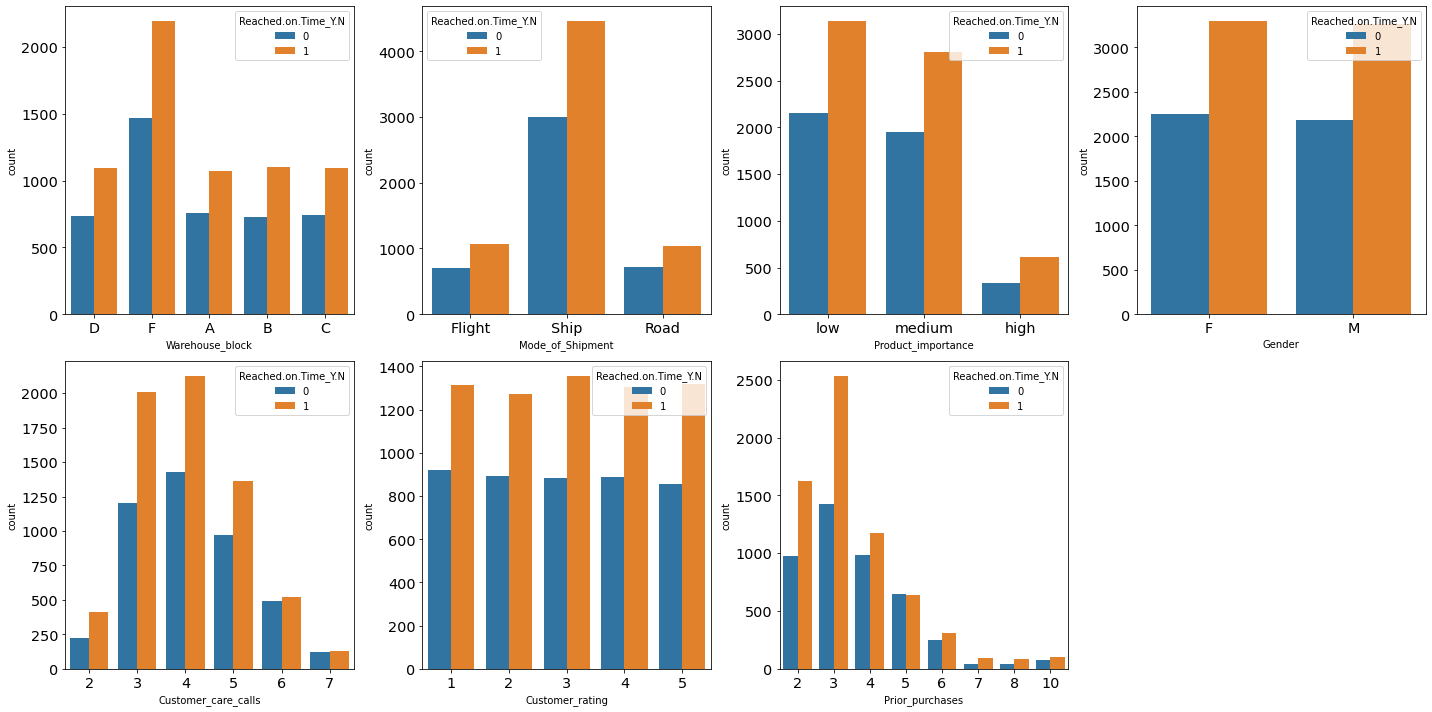

In [ ]:
plt.figure(figsize=(20, 10))
for i in range(0, len(cats)):
    plt.subplot(2, 4, i+1)
    sns.countplot(x = df[cats[i]], orient='v', hue=df['Reached.on.Time_Y.N'])
    plt.tight_layout()

## Dist Plot (Numerical)

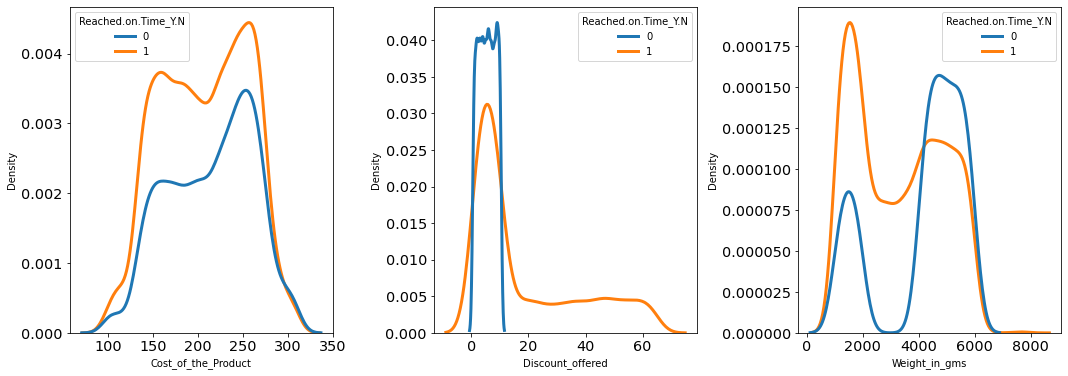

In [ ]:
features = nums
plt.figure(figsize=(20, 10))
for i in range(0, len(nums)):
    plt.subplot(2, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='green', hue=df['Reached.on.Time_Y.N'])
    plt.xlabel(features[i])
    plt.tight_layout()

## Boxplot

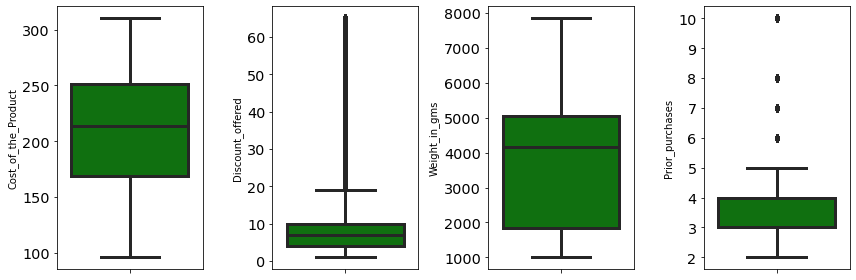

In [ ]:
features = ['Cost_of_the_Product','Discount_offered','Weight_in_gms','Prior_purchases']
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='green',orient='v')
    plt.tight_layout()

##FEATURE TRANSFORMATION

In [ ]:
from scipy.stats import boxcox

#TRANSFORMASI LOG UNTUK FEATURE Discount_offered MENGGUNAKAN BOXCOX
df['bc0_discount'] = boxcox(df['Discount_offered'],0)
#TRANSFORMASI SQUARE UNTUK FEATURE Weight_in_gms MENGGUNAKAN BOXCOX
df['bc2_weight'] = boxcox(df['Weight_in_gms'],2)
df.describe()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N,bc0_discount,bc2_weight
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,1.099900e+04
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691,1.998420,7.940146e+06
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584,1.083692,5.686657e+06
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000,0.000000,5.010000e+05
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000,1.386294,1.691880e+06
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000,1.945910,8.607100e+06
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000,2.302585,1.275125e+07
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000,4.174387,3.077986e+07


###STANDARISASI

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
df['bc0_discount_std']=StandardScaler().fit_transform((df['bc0_discount']).values.reshape(len(df), 1))
df['bc2_weight_std']=StandardScaler().fit_transform((df['bc2_weight']).values.reshape(len(df), 1))
df['Cost_of_the_Product_std']=StandardScaler().fit_transform((df['Cost_of_the_Product']).values.reshape(len(df), 1))

In [ ]:
df.agg(['skew']).transpose()

,skew
ID,0.000000
Customer_care_calls,0.391926
Customer_rating,0.004360
Cost_of_the_Product,-0.157117
Prior_purchases,1.681897
Discount_offered,1.798929
Weight_in_gms,-0.249747
Reached.on.Time_Y.N,-0.394257
bc0_discount,0.218223
bc2_weight,0.114394


Dari value skewness diatas dapat dilihat bahwa nilai skewness atribut yang sudah ditransformasi memiliki nilai mendekati 0 dibandingkan dengan atribut yang tidak ditransformasi

Weight_in_gms = -0.249746 <br>
Weight_in_gms Transformasi = 0.114394 <br>

Discount_offered = 1.798929 <br>
Discount_offered Transformasi = 0.218223 <br>

##FEATURE ENCODING


###LABEL ENCODING

In [ ]:
mapping_product_importance = {
    'low' : 0,
    'medium' : 1,
    'high' : 2,
}

mapping_gender = {
    'F' : 0,
    'M' : 1,
}

df['Gender'] = df['Gender'].map(mapping_gender)
df['Product_importance'] = df['Product_importance'].map(mapping_product_importance)

###ONE HOT ENCODING

In [ ]:
for cats in ['Warehouse_block', 'Mode_of_Shipment']:
    onehots = pd.get_dummies(df[cats], prefix=cats)
    df = df.join(onehots)

In [ ]:
df=df.drop(['Warehouse_block', 'ID', 'Mode_of_Shipment'], axis=1)

###CLASS IMBALANCE

In [ ]:
df['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

##FEATURE SELECTION

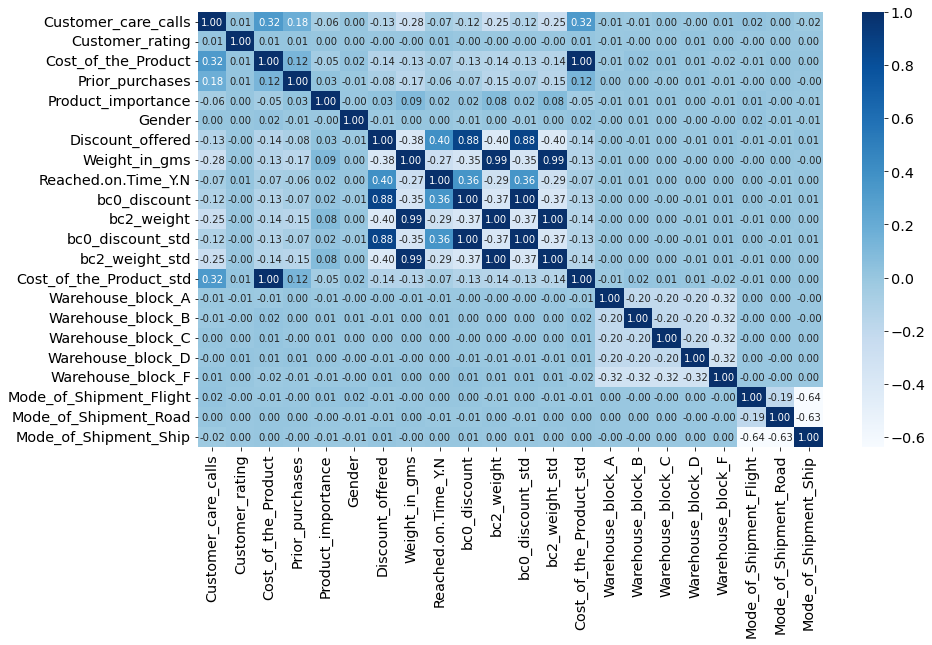

In [ ]:
plt.figure(figsize=(14, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

In [ ]:
df=df.drop(columns=['Gender','Mode_of_Shipment_Flight','Mode_of_Shipment_Road','Mode_of_Shipment_Ship','Warehouse_block_A','Warehouse_block_B','Warehouse_block_C','Warehouse_block_D','Warehouse_block_F', 'Weight_in_gms', 'Discount_offered', 'bc0_discount', 'Cost_of_the_Product', 'bc2_weight'])

In [ ]:
df.head()

,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Reached.on.Time_Y.N,bc0_discount_std,bc2_weight_std,Cost_of_the_Product_std
0,4,2,3,0,1,1.647932,-1.262663,-0.690722
1,4,5,2,0,1,1.918637,-0.557871,0.120746
2,2,2,4,0,1,1.728227,-0.395366,-0.565881
3,3,3,4,1,1,0.280688,-1.274529,-0.711529
4,2,2,3,1,1,1.688952,-0.853795,-0.545074


In [ ]:
df.describe()

,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Reached.on.Time_Y.N,bc0_discount_std,bc2_weight_std,Cost_of_the_Product_std
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,1.099900e+04,1.099900e+04,1.099900e+04
mean,4.054459,2.990545,3.567597,0.604600,0.596691,-1.087135e-14,-2.154836e-16,-2.113653e-16
std,1.141490,1.413603,1.522860,0.641464,0.490584,1.000045e+00,1.000045e+00,1.000045e+00
min,2.000000,1.000000,2.000000,0.000000,0.000000,-1.844168e+00,-1.308235e+00,-2.376077e+00
25%,3.000000,2.000000,3.000000,0.000000,0.000000,-5.648775e-01,-1.098809e+00,-8.571765e-01
50%,4.000000,3.000000,3.000000,1.000000,1.000000,-4.845668e-02,1.172893e-01,7.913188e-02
75%,5.000000,4.000000,4.000000,1.000000,1.000000,2.806876e-01,8.460722e-01,8.489855e-01
max,7.000000,5.000000,10.000000,2.000000,1.000000,2.008011e+00,4.016552e+00,2.076590e+00


#Stage 3

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, f1_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
x=df.drop(columns='Reached.on.Time_Y.N')
y=df['Reached.on.Time_Y.N']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=10)

In [ ]:
def eval_model(model,Xtrain,ytrain,Xtest,ytest):
  train_pred=model.predict(Xtrain)
  print('Accuracy Score (Train_Set) : %.2f' % accuracy_score(ytrain, train_pred))
  print('Precision Score (Train_Set) : %.2f' % precision_score(ytrain, train_pred))
  print('f1 Score (Train_Set) : %.2f' % f1_score(ytrain, train_pred))
  print('Recall Score (Train_Set) : %.2f' % recall_score(ytrain, train_pred))
  test_pred=model.predict(Xtest)
  print('Accuracy Score (Test_Set) : %.2f' % accuracy_score(ytest, test_pred))
  print('Precision Score (Test_Set) : %.2f' % precision_score(ytest, test_pred))
  print('f1 Score (Test_Set) : %.2f' % f1_score(ytest, test_pred))
  print('Recall Score (Test_Set) : %.2f' % recall_score(ytest, test_pred))
  print(confusion_matrix(y_test, test_pred))

#LOGREG

##Sebelum Hyper

In [ ]:
logreg= LogisticRegression(random_state=10) # inisiasi model
logreg.fit(x_train, y_train) # Latih model
y_pred1=logreg.predict(x_test)
print(classification_report(y_test,y_pred1))
eval_model(logreg,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.57      0.46      0.51      1106
           1       0.68      0.76      0.72      1644

    accuracy                           0.64      2750
   macro avg       0.62      0.61      0.61      2750
weighted avg       0.63      0.64      0.63      2750

Accuracy Score (Train_Set) : 0.63
Precision Score (Train_Set) : 0.67
f1 Score (Train_Set) : 0.70
Recall Score (Train_Set) : 0.74
Accuracy Score (Test_Set) : 0.64
Precision Score (Test_Set) : 0.68
f1 Score (Test_Set) : 0.72
Recall Score (Test_Set) : 0.76
[[ 508  598]
 [ 391 1253]]


##Setelah Hyper

In [ ]:
penalty=[ 'l2','l1','elasticnet']
C=[0.001,0.002,0.0001]
hyperparameters = dict(penalty=penalty, C=C) 

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
model1= LogisticRegression(random_state=10) # inisiasi model
logregh = RandomizedSearchCV(model1, hyperparameters, cv=5, random_state=10, scoring='precision') # randomize search dengan 5-fold cross-val
logregh.fit(x_train, y_train) # Latih model
y_pred2=logregh.predict(x_test)
print(classification_report(y_test,y_pred2))
eval_model(logregh,x_train,y_train,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


              precision    recall  f1-score   support

           0       0.57      0.40      0.47      1106
           1       0.66      0.79      0.72      1644

    accuracy                           0.64      2750
   macro avg       0.62      0.60      0.60      2750
weighted avg       0.62      0.64      0.62      2750

Accuracy Score (Train_Set) : 0.63
Precision Score (Train_Set) : 0.66
f1 Score (Train_Set) : 0.71
Recall Score (Train_Set) : 0.77
Accuracy Score (Test_Set) : 0.64
Precision Score (Test_Set) : 0.66
f1 Score (Test_Set) : 0.72
Recall Score (Test_Set) : 0.79
[[ 444  662]
 [ 339 1305]]


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
30 fits failed out of a total of 45.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

# KNN

##Sebelum Hyper

In [ ]:
KNN=KNeighborsClassifier()
KNN.fit(x_train, y_train)
y_pred3=KNN.predict(x_test)
print(classification_report(y_test,y_pred3))
eval_model(KNN,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.55      0.59      0.57      1106
           1       0.71      0.67      0.69      1644

    accuracy                           0.64      2750
   macro avg       0.63      0.63      0.63      2750
weighted avg       0.65      0.64      0.64      2750

Accuracy Score (Train_Set) : 0.77
Precision Score (Train_Set) : 0.83
f1 Score (Train_Set) : 0.80
Recall Score (Train_Set) : 0.78
Accuracy Score (Test_Set) : 0.64
Precision Score (Test_Set) : 0.71
f1 Score (Test_Set) : 0.69
Recall Score (Test_Set) : 0.67
[[ 656  450]
 [ 538 1106]]


##Setelah Hyper

In [ ]:
#hyperparameter
n_neighbors = list(range(2,105))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

In [ ]:
model2=KNeighborsClassifier()
KNNh = RandomizedSearchCV(model2, hyperparameters, cv=5, random_state=10, scoring='precision')
KNNh.fit(x_train, y_train)
y_pred4=KNNh.predict(x_test)
print(classification_report(y_test,y_pred4))
eval_model(KNNh,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.57      0.80      0.66      1106
           1       0.82      0.58      0.68      1644

    accuracy                           0.67      2750
   macro avg       0.69      0.69      0.67      2750
weighted avg       0.72      0.67      0.67      2750

Accuracy Score (Train_Set) : 0.69
Precision Score (Train_Set) : 0.83
f1 Score (Train_Set) : 0.70
Recall Score (Train_Set) : 0.60
Accuracy Score (Test_Set) : 0.67
Precision Score (Test_Set) : 0.82
f1 Score (Test_Set) : 0.68
Recall Score (Test_Set) : 0.58
[[890 216]
 [684 960]]


#SVM

##Sebelum Hyper

In [ ]:
SVM = svm.SVC (random_state=10)
SVM.fit(x_train, y_train)
y_pred5=SVM.predict(x_test)
print(classification_report(y_test,y_pred5))
eval_model(SVM,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.56      0.87      0.68      1106
           1       0.86      0.54      0.67      1644

    accuracy                           0.67      2750
   macro avg       0.71      0.70      0.67      2750
weighted avg       0.74      0.67      0.67      2750

Accuracy Score (Train_Set) : 0.67
Precision Score (Train_Set) : 0.87
f1 Score (Train_Set) : 0.65
Recall Score (Train_Set) : 0.52
Accuracy Score (Test_Set) : 0.67
Precision Score (Test_Set) : 0.86
f1 Score (Test_Set) : 0.67
Recall Score (Test_Set) : 0.54
[[958 148]
 [751 893]]


##Setelah Hyper

In [ ]:
kernel = ['linear','rbf','poly']
hyperparameters = dict(kernel=kernel)
model3 = svm.SVC (random_state=10)
SVMh = RandomizedSearchCV(model3, hyperparameters, cv=5, scoring='precision')
SVMh.fit(x_train, y_train)
y_pred6=SVMh.predict(x_test)
print(classification_report(y_test,y_pred6))
eval_model(SVMh,x_train,y_train,x_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


              precision    recall  f1-score   support

           0       0.56      0.87      0.68      1106
           1       0.86      0.54      0.67      1644

    accuracy                           0.67      2750
   macro avg       0.71      0.70      0.67      2750
weighted avg       0.74      0.67      0.67      2750

Accuracy Score (Train_Set) : 0.67
Precision Score (Train_Set) : 0.87
f1 Score (Train_Set) : 0.65
Recall Score (Train_Set) : 0.52
Accuracy Score (Test_Set) : 0.67
Precision Score (Test_Set) : 0.86
f1 Score (Test_Set) : 0.67
Recall Score (Test_Set) : 0.54
[[958 148]
 [751 893]]


# Decision Tree

##Sebelum Hyper

In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(random_state=10)
DT.fit(x_train, y_train)
y_pred7=DT.predict(x_test)
print(classification_report(y_test,y_pred7))
eval_model(DT,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.60      0.57      0.58      1106
           1       0.72      0.74      0.73      1644

    accuracy                           0.67      2750
   macro avg       0.66      0.65      0.65      2750
weighted avg       0.67      0.67      0.67      2750

Accuracy Score (Train_Set) : 1.00
Precision Score (Train_Set) : 1.00
f1 Score (Train_Set) : 1.00
Recall Score (Train_Set) : 1.00
Accuracy Score (Test_Set) : 0.67
Precision Score (Test_Set) : 0.72
f1 Score (Test_Set) : 0.73
Recall Score (Test_Set) : 0.74
[[ 625  481]
 [ 425 1219]]


##Setelah Hyper

In [ ]:
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

#### LENGKAPI DENGAN JAWABAN CHALLENGE TIME DISINI ####


hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )


In [ ]:
model4 = DecisionTreeClassifier(random_state=10)
DTh = RandomizedSearchCV(model4, hyperparameters, cv=5, scoring='precision')
DTh.fit(x_train, y_train)
y_pred8=DTh.predict(x_test)
print(classification_report(y_test,y_pred8))
eval_model(DTh,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.56      0.70      0.62      1106
           1       0.76      0.63      0.69      1644

    accuracy                           0.66      2750
   macro avg       0.66      0.67      0.66      2750
weighted avg       0.68      0.66      0.66      2750

Accuracy Score (Train_Set) : 0.70
Precision Score (Train_Set) : 0.80
f1 Score (Train_Set) : 0.73
Recall Score (Train_Set) : 0.67
Accuracy Score (Test_Set) : 0.66
Precision Score (Test_Set) : 0.76
f1 Score (Test_Set) : 0.69
Recall Score (Test_Set) : 0.63
[[ 772  334]
 [ 601 1043]]


#Xgboost

##Sebelum Hyper

In [ ]:
pip install xgboost

In [ ]:
import xgboost as xgb

In [ ]:
xg = xgb.XGBClassifier(random_state=10)
xg.fit(x_train,y_train)

# Predict & Evaluation
y_pred9 = xg.predict(x_test)
print(classification_report(y_test,y_pred9))
eval_model(xg,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.57      0.87      0.69      1106
           1       0.86      0.56      0.68      1644

    accuracy                           0.68      2750
   macro avg       0.72      0.71      0.68      2750
weighted avg       0.75      0.68      0.68      2750

Accuracy Score (Train_Set) : 0.71
Precision Score (Train_Set) : 0.91
f1 Score (Train_Set) : 0.70
Recall Score (Train_Set) : 0.57
Accuracy Score (Test_Set) : 0.68
Precision Score (Test_Set) : 0.86
f1 Score (Test_Set) : 0.68
Recall Score (Test_Set) : 0.56
[[962 144]
 [729 915]]


##Setelah Hyper

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
model5 = xgb.XGBClassifier(random_state=10)
xgh = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=10, scoring='precision')
xgh.fit(x_train,y_train)

# Predict & Evaluation
y_pred10 = xgh.predict(x_test)
print(classification_report(y_test,y_pred10))
eval_model(xgh,x_train,y_train,x_test,y_test)


              precision    recall  f1-score   support

           0       0.58      0.69      0.63      1106
           1       0.76      0.66      0.71      1644

    accuracy                           0.68      2750
   macro avg       0.67      0.68      0.67      2750
weighted avg       0.69      0.68      0.68      2750

Accuracy Score (Train_Set) : 0.79
Precision Score (Train_Set) : 0.87
f1 Score (Train_Set) : 0.81
Recall Score (Train_Set) : 0.75
Accuracy Score (Test_Set) : 0.68
Precision Score (Test_Set) : 0.76
f1 Score (Test_Set) : 0.71
Recall Score (Test_Set) : 0.66
[[ 768  338]
 [ 554 1090]]


#NaiveBayes

##Sebelum Hyper

In [ ]:
# Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(x_train, y_train)

# Predicting the Test set results
y_pred11 = GNB.predict(x_test)

# Making the Confusion Matrix
print(classification_report(y_test,y_pred11))
eval_model(GNB,x_train,y_train,x_test,y_test)

              precision    recall  f1-score   support

           0       0.56      0.66      0.61      1106
           1       0.74      0.65      0.69      1644

    accuracy                           0.65      2750
   macro avg       0.65      0.65      0.65      2750
weighted avg       0.67      0.65      0.66      2750

Accuracy Score (Train_Set) : 0.65
Precision Score (Train_Set) : 0.73
f1 Score (Train_Set) : 0.69
Recall Score (Train_Set) : 0.64
Accuracy Score (Test_Set) : 0.65
Precision Score (Test_Set) : 0.74
f1 Score (Test_Set) : 0.69
Recall Score (Test_Set) : 0.65
[[ 731  375]
 [ 578 1066]]


In [ ]:
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
model6 = GaussianNB()
GNBh = GridSearchCV(estimator=model6, 
                     param_grid=params_NB, 
                     cv=5,
                     verbose=1, 
                     scoring='precision')
GNBh.fit(x_train, y_train)

# Predicting the Test set results
y_pred12 = GNBh.predict(x_test)

# Making the Confusion Matrix
print(classification_report(y_test,y_pred12))
eval_model(GNBh,x_train,y_train,x_test,y_test)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
              precision    recall  f1-score   support

           0       0.56      0.66      0.61      1106
           1       0.74      0.65      0.69      1644

    accuracy                           0.66      2750
   macro avg       0.65      0.66      0.65      2750
weighted avg       0.67      0.66      0.66      2750

Accuracy Score (Train_Set) : 0.65
Precision Score (Train_Set) : 0.74
f1 Score (Train_Set) : 0.69
Recall Score (Train_Set) : 0.64
Accuracy Score (Test_Set) : 0.66
Precision Score (Test_Set) : 0.74
f1 Score (Test_Set) : 0.69
Recall Score (Test_Set) : 0.65
[[ 729  377]
 [ 568 1076]]


Text(0.5, 0, 'Permutation Importance')

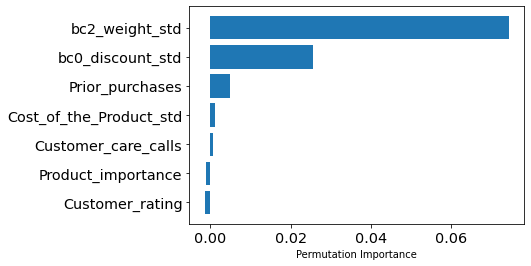

In [ ]:
from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

svc =  SVC(kernel='rbf')
svc.fit(x_train, y_train)

perm_importance = permutation_importance(svc, x_test, y_test)

feature_names = ['Customer_care_calls','Customer_rating','Prior_purchases','Product_importance','bc0_discount_std','bc2_weight_std','Cost_of_the_Product_std']
features = np.array(feature_names)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(features[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")


## ITERASI MODEL SVM DENGAN FEATURE SELECTION

In [ ]:
df.sample(5)

,Customer_care_calls,Customer_rating,Prior_purchases,Product_importance,Reached.on.Time_Y.N,bc0_discount_std,bc2_weight_std,Cost_of_the_Product_std
5283,6,4,4,1,1,-0.048457,-1.291103,1.702066
6897,4,2,5,1,1,-0.190709,-1.131349,1.119475
10941,5,1,5,1,1,0.074768,-1.156663,0.162359
7805,3,2,6,0,1,0.183460,1.039223,0.183166
1004,3,2,6,1,1,1.964406,-1.277614,-1.335734


In [ ]:
x1=df.drop(columns=['Reached.on.Time_Y.N','Customer_care_calls','Customer_rating','Prior_purchases','Product_importance','Cost_of_the_Product_std'])
y1=df['Reached.on.Time_Y.N']

In [ ]:
from sklearn.model_selection import train_test_split
x1_train, x1_test, y1_train, y1_test=train_test_split(x1, y1, test_size=0.25, random_state=10)

In [ ]:
kernel = ['linear','rbf','poly']
hyperparameters = dict(kernel=kernel)
modelnew = svm.SVC (random_state=10)
SVMnew = RandomizedSearchCV(modelnew, hyperparameters, cv=5, scoring='precision')
SVMnew.fit(x1_train, y1_train)
y_prednew=SVMnew.predict(x1_test)
print(classification_report(y1_test,y_prednew))
eval_model(SVMnew,x1_train,y1_train,x1_test,y1_test)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


              precision    recall  f1-score   support

           0       0.57      0.76      0.65      1106
           1       0.79      0.62      0.69      1644

    accuracy                           0.67      2750
   macro avg       0.68      0.69      0.67      2750
weighted avg       0.70      0.67      0.68      2750

Accuracy Score (Train_Set) : 0.67
Precision Score (Train_Set) : 0.79
f1 Score (Train_Set) : 0.69
Recall Score (Train_Set) : 0.60
Accuracy Score (Test_Set) : 0.67
Precision Score (Test_Set) : 0.79
f1 Score (Test_Set) : 0.69
Recall Score (Test_Set) : 0.62
[[ 842  264]
 [ 632 1012]]
